<a href="https://colab.research.google.com/github/victor-roris/ML-learning/blob/master/TextExtraction/TextRecognition_PDFMinerSix_PDFExtractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDFMiner.six - PDF analyzer

Pdfminer.six is a python package for extracting information from PDF documents.

- [Documentation](https://pdfminersix.readthedocs.io/en/latest/index.html)
- [Github](https://github.com/pdfminer/pdfminer.six)


In this notebook, we are going to explain some basic instructions of the library to obtain the text of a PDF and present some examples to quickly analyse the performance of the tool. 

The personal impression is that the tool works fine with machine-generated and plain pdfs. But it has important problems with scanned.

## Installation

In [ ]:
pip install pdfminer.six

## General instructions

### Get a PDF

In [2]:
from joblib import Memory
from pathlib import Path
# !pip install requests
import requests

path = Path('.')
CACHE_DIR =  path / '.jupyter_cache'
memory = Memory(CACHE_DIR, verbose=0)

# @memory.cache
def download(url, dst):
    response = requests.get(url, allow_redirects=True)
    with open(dst, 'wb') as f:
        f.write(response.content)

In [3]:
url = 'https://ai2-website.s3.amazonaws.com/publications/Siegel16eccv.pdf'
fn = path / 'example.pdf'

download(url, fn)

fn

PosixPath('example.pdf')

### Get text

In [10]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

# Define output text structure
output_string = StringIO()

# Open PDF file
with open(fn, 'rb') as in_file:

    # Link parser with the PDF
    parser = PDFParser(in_file)

    # Define the document by the parser
    doc = PDFDocument(parser)

    # Define a manager
    rsrcmgr = PDFResourceManager()

    # Define a text converter by link the manager, the output structure and conf
    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())

    # Define an interpreter by manager a text converter
    interpreter = PDFPageInterpreter(rsrcmgr, device)

    # Generator to 
    pageit = PDFPage.create_pages(doc)

    # # - Extract text of all the pages
    # for page in pageit:
    #     interpreter.process_page(page)
    
    # - Get the text of the first page
    page = next(PDFPage.create_pages(doc))
    interpreter.process_page(page)

print(output_string.getvalue())

FigureSeer: Parsing Result-Figures in Research Papers

Noah Siegel, Zachary Horvitz, Roie Levin, Santosh Divvala, and Ali Farhadi

Allen Institute for Artiﬁcial Intelligence

University of Washington

http://allenai.org/plato/ﬁgureseer

Fig. 1: FigureSeer is an end-to-end framework for parsing result-ﬁgures in research
papers. It automatically localizes ﬁgures, classiﬁes them, and analyses their content
(center). FigureSeer enables detailed indexing, retrieval, and redesign of result-ﬁgures,
such as highlighting speciﬁc results (top-left), reformatting results (bottom-left), com-
plex query answering (top-right), and results summarization (bottom-right).

Abstract. ‘Which are the pedestrian detectors that yield a precision
above 95% at 25% recall?’ Answering such a complex query involves
identifying and analyzing the results reported in ﬁgures within several
research papers. Despite the availability of excellent academic search en-
gines, retrieving such information poses a cumbersome 

## Test PDFs

Post-Evaluation: the library extract the text correctly when the document is simple and machine generated. It correctly extract column text and list. But it fails with scanned documents (no text extracted).

To visualize the page we are going to use the PyMuPDF tool (only for debug purpose).

In [ ]:
!pip install PyMuPDF

In [19]:
import fitz
from PIL import Image
import matplotlib.pyplot as plt

def download_pdf(pdf_url):
  # Download the PDF
  fn = path / 'example.pdf'
  download(pdf_url, fn)
  return fn

def print_page(page):
  # Page to Image
  pix = page.getPixmap()

  # Visualization 
  mode = "RGBA" if pix.alpha else "RGB"
  img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)

  plt.figure(figsize=(10,20))
  plt.imshow(img);

def get_text(pdf_url, page_no=0):
  # Download the PDF
  fn = download_pdf(pdf_url)

  # Visualize page (we use only for this PyMuPDF)
  doc = fitz.open(fn)
  page = doc[page_no]
  print_page(page)

  # - pdfminer.six text extraction

  # Define output text structure
  text = StringIO()

  # Open PDF file
  with open(fn, 'rb') as in_file:

      # Link parser with the PDF
      parser = PDFParser(in_file)

      # Define the document by the parser
      doc = PDFDocument(parser)

      # Define a manager
      rsrcmgr = PDFResourceManager()

      # Define a text converter by link the manager, the output structure and conf
      device = TextConverter(rsrcmgr, text, laparams=LAParams())

      # Define an interpreter by manager a text converter
      interpreter = PDFPageInterpreter(rsrcmgr, device)

      # Generator to 
      pageit = PDFPage.create_pages(doc)

      # - Extract text of all the pages
      for idx, page in enumerate(pageit):
          if idx == page_no:
            interpreter.process_page(page)
            break
      
      # - Get the text of the first page
      # page = next(PDFPage.create_pages(doc))
      # interpreter.process_page(page)

  return text.getvalue()

### Formal document

Artículo Original: Cervera Peris et al 

RESUMEN

ABSTRACT

Objetivo:  Implantar  un  sistema  mSalud  para  la 
gestión y trazabilidad de la nutrición parenteral 
(NP) domiciliaria.

Objective:  To  put  into  practice  an  mSalud  sys-
tem for the management and traceability of par-
enteral nutrition (PN) at home.

Método: Estudio descriptivo transversal, siendo 
la unidad de análisis las bolsas de NP de admi-
nistración domiciliaria del Hospital Universitario 
Son Espases de Palma (HUSE), España, duran-
te 3 meses. Las bolsas fueron etiquetadas con 
un identificador unívoco (etiqueta QR) que faci-
litó su lectura de datos mediante un dispositivo 
móvil. Las etapas a controlar fueron: validación 
y transcripción de la prescripción, preparación, 
conservación y administración, siendo los pun-
tos  críticos  de  control  el  control  gravimétrico, 
la  temperatura  de  conservación,  el  volumen  y 
tiempo  de  infusión  (bomba  de  administración) 
y la existencia e integridad del fil

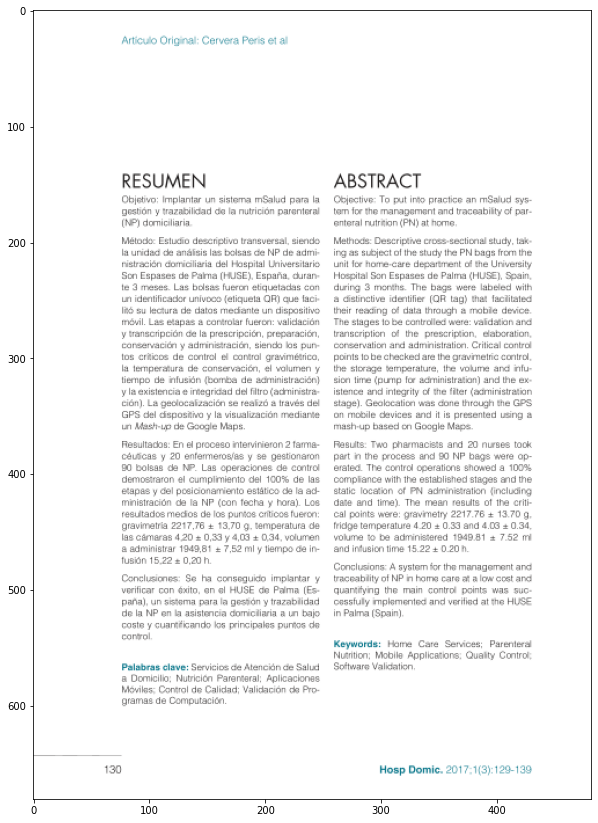

In [20]:
url = 'https://www.revistahad.eu/index.php/revistahad/issue/download/4/5'
text = get_text(url, 11)

print(text)

Q&A: Access to Education  
Information for field staff and refugee parents 
 
 
The following Q&A was produced in accordance with information from the Ministry of Education, 
Research, and Religious Affairs’ plan so to ensure better communication with refugee parents and 
children staying in Greece.  
 
Accessing in public schools in Greece does not oblige refugees to stay in Greece. Education for refugee 
children is available while they stay in Greece and is beneficial to them, as it provides some stability and 
normalcy. In addition, documentation of attendance will be provided upon departure from Greece. 
 
Who is eligible? 
 
All children have the right to access school education in Greece, without distinction. The unique condition 
for children to attend school is to be vaccinated, which lies under the responsibility of the Greek Ministry 
of Health.  
The first stage of the Ministry’s programme is focusing on providing access to children between 4-15 
years old, who are of compu

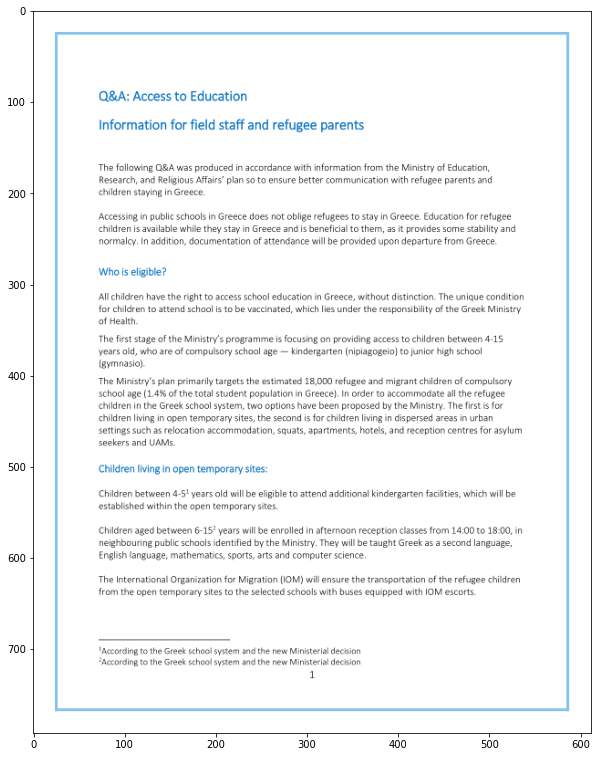

In [ ]:
url = 'https://data2.unhcr.org/es/documents/download/52035'
text = get_text(url)

print(text)

   
OECD STANDARDISED FORMAT FOR AUTOMATIC EXCHANGE 
 OF INFORMATION FOR TAX PURPOSES 
Background 
1.  Article 26 of the OECD Model Tax Convention allows for tax information to be exchanged by 
competent authorities in three ways: on-request, automatically and spontaneously. Information suitable for 
automatic exchange is typically bulk information comprising many individual cases of the same type, 
usually consisting of details of income arising from sources in the supplying state where such information 
is available periodically under that state’s own system and can be transmitted automatically on a routine 
basis. Automatic exchange of information requires standardisation of formats in order to be efficient.  
2.  The OECD’s first step towards standardising the presentation of this type of information resulted 
in the design, in 1981, of a paper-based form for use in automatic (routine) exchange. The subsequent 
proliferation of electronic data processing capabilities within tax adm

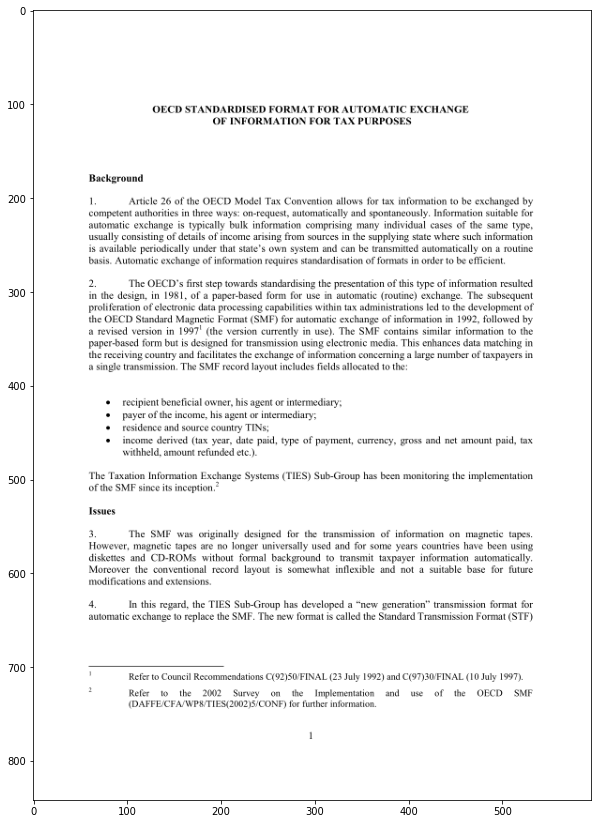

In [ ]:
url = 'https://www.oecd.org/tax/exchange-of-tax-information/40501987.pdf'
text = get_text(url)

print(text)

### Extructured: Form, Tables, etc.

   
ANNEX 1 
 
OECD STANDARD FOR EXCHANGE OF INFORMATION IN TAXATION (SEIT) 
 
On-request and spontaneous exchange   Automatic exchange  
Physical exchange  Electronic exchange  Physical exchange  Electronic exchange 
         
Level 1  Paper documents   Email attachment  Magnetic  tape,  diskette,  Email attachment5 
  transmitted  via  CD  Rom  (or  DVD4)  Electronic file transfer6 
Transmission  normal  mail,  transmitted  via  normal  SOAP7 
media  commercial  mail, commercial courier, 
  courier,  diplomatic  diplomatic bag etc. 
bag etc.   
 
         
Level 2  No  encryption  of  Standard  Transmission  Standard  Transmission  Standard  Transmission 
  paper documents.   Encryption8   Encryption    Encryption  
Encryption      (see footnote 13)  (see footnote 13) 
            
    [see  DAFFE/CFA/  [see  DAFFE/CFA/  [see  DAFFE/CFA/ 
    WP8/TIES(2003)5/CONF  WP8/TIES(2003)5/CONF  WP8/TIES(2003)5/CONF 
    for  encryption  and  key  for  encryption  and  key  for  encryption  an

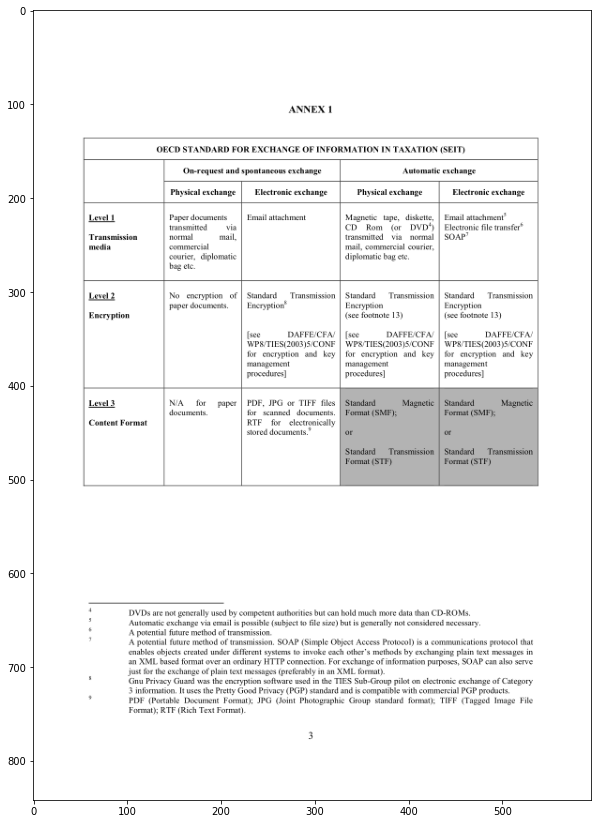

In [ ]:
url = "https://www.oecd.org/tax/exchange-of-tax-information/40501987.pdf"
text = get_text(url, 2)

print(text)

 Employment Eligibility Verification  USCIS 
Form I-9
Department of Homeland Security 
OMB No. 1615-0047
U.S. Citizenship and Immigration Services 
Expires 10/31/2022 
►START HERE:  Read instructions carefully before completing this form. The instructions must be available, either in paper or electronically,  
during completion of this form.  Employers are liable for errors in the completion of this form. 
  
ANTI-DISCRIMINATION NOTICE: It is illegal to discriminate against work-authorized individuals. Employers CANNOT specify which document(s) an 
employee may present to establish employment authorization and identity. The refusal to hire or continue to employ an individual because the 
documentation presented has a future expiration date may also constitute illegal discrimination.  
Section 1. Employee Information and Attestation  (Employees must complete and sign Section 1 of Form I-9 no later 
than the first day of employment, but not before accepting a job offer.) 
Last Name (Fami

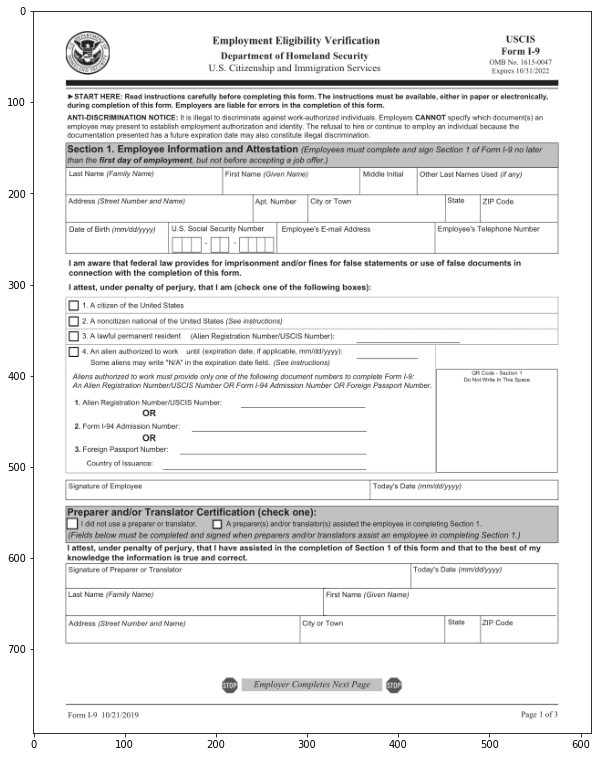

In [ ]:
url = "https://www.uscis.gov/sites/default/files/document/forms/i-9-paper-version.pdf"
text = get_text(url)

print(text)

### Colorful

Note: we use `text` output format. That means, the images are not included. To extract images you can use other format as `html`. 

List of Acceptable Documents  
for REAL ID-Compliant  
Document Processing:
Applicants must present documents in each of the following categories. Please note that  
some documents are eligible to be used as both identity and lawful status verification.
1.  Identity                Certificate of Naturalization 
         One (1) of these documents with                 Certificate of Citizenship
            your full name and date of birth:
              Valid, Unexpired Permanent Resident Card
              Valid, Unexpired U.S. passport                Valid, Unexpired Employment Authorization  
              Valid, Unexpired U.S. passport card                Document (EAD)  
              Certified U.S. Birth Certificate                Valid, Unexpired Foreign Passport with a valid,  
              unexpired U.S. visa accompanied by an I-94 
              U.S. Birth Abroad 
              Certificate of Naturalization                
The following documents are not acceptable 
         

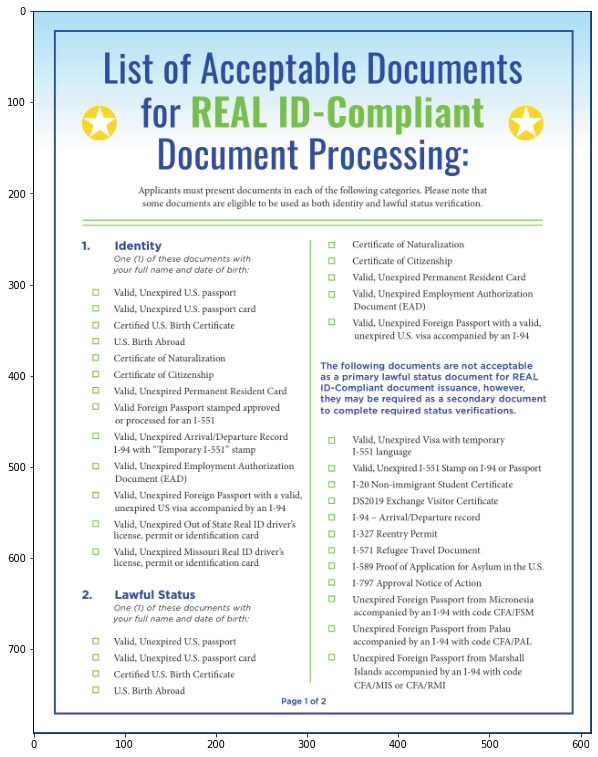

In [ ]:
url = "https://dor.mo.gov/drivers/real-id-information/documents/RID.pdf"
text = get_text(url)

print(text)

and is based on extensible markup language (XML3), a document markup language widely used in today’s 
information technology for its many advantages, e.g.: 
•  separation of the content of a message from any display structure;   
•  readability both by humans and machines;  
•  modularity and flexibility; 
•  ability to check the conformance of documents with the “contract” about its structure; 
•  availability of a host of tools. 
 
Annex 2 sets out the schemas of the STF (this information is primarily for the benefit of staff involved with 
the information technology aspects of exchange of information).  
 
5.  The STF is intended to co-exist with the SMF rather than to replace it in the near future. The 
SMF remains an effective tool and the TIES Sub-Group will continue to support its use for the foreseeable 
future. Migrating to the STF in the short term is not a practical option for most countries that currently use 
the SMF. However, the majority of OECD countries currently do no

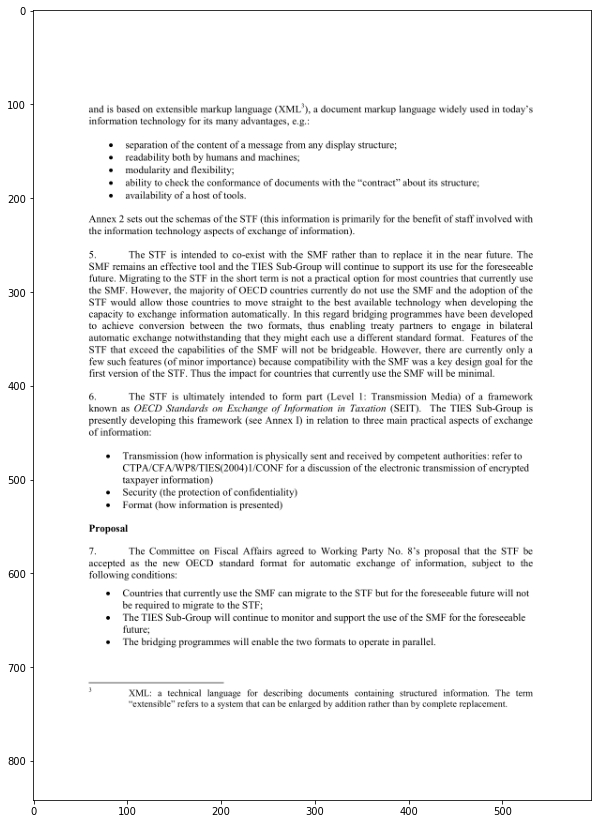

In [ ]:
url = 'https://www.oecd.org/tax/exchange-of-tax-information/40501987.pdf'
text = get_text(url, 1)

print(text)

 
As an example, let us consider a date. Dates can be included in RDF using the 
Gregorian date datatype from XML Schema, this then needs to be correctly formatted 
for the user locale before display. 
 
In our knowledge base, we may have a triple like: 
http://www.example.org/index.html 
http://www.example.org/terms/creation-date
“1999-08-16”^^xsd:date 
 
The value ”1999-08-16”^^xsd:date, indicates the Gregorian date. 
 
Java code, using Jena, that formats this date for the French locale, could include the 
following snippet: 
 
Model model = ModelFactory.createDefaultModel(); 
... // read in RDF graph from Web 
 
String url = "http://www.example.org/"; 
Resource index = model.getResource(url+"index.html"); 
Property creationDate =  
            model.createProperty(url+"terms/creation-date"); 
// Extract date from triple store. 
XSDDateTime date = (XSDDateTime)index. 
                         getProperty(creationDate). 
                         getLiteral(). 
                        

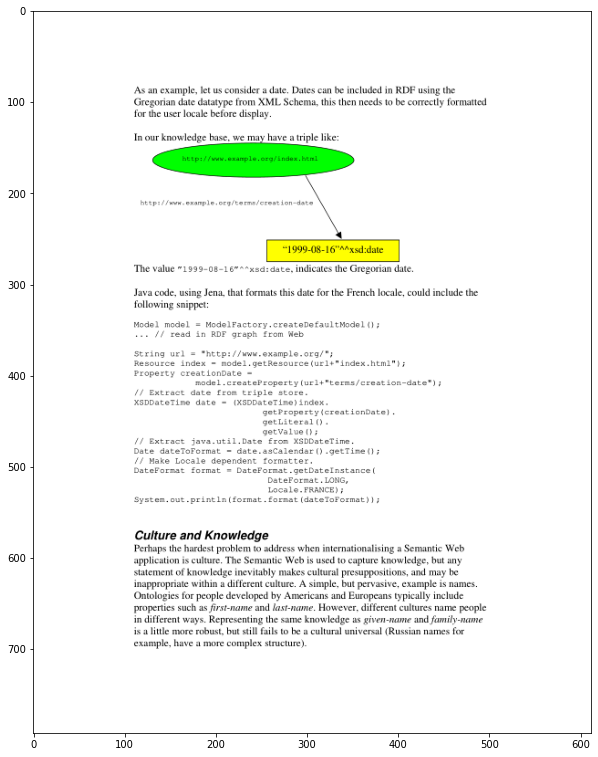

In [ ]:
url = "https://www.hpl.hp.com/techreports/2005/HPL-2005-67.pdf"
text = get_text(url, 9)

print(text)

A Telematic Based Approach Towards the Normalization of Clinical Praxis 663
sense, the system enables the generation of audit reports and real-time filtering of 
historical  traces.  It  also  allows  the  generation  of  human-friendly  reports  (e.g., 
graphics) with the extracted information. Based on this, managers can perform better 
analysis and, thus, optimize effort and resources. 
 
 
Fig. 1.  Client-server interaction for the invocation of a control operation. 
 
 
Fig. 2.  Semantic model focused on the characterization of traces. 
In  order  to  achieve  greater  effectiveness  in  this  type  of  analysis,  the  more 
comprehensive and the more detailed the information, the better. In this case, the use 


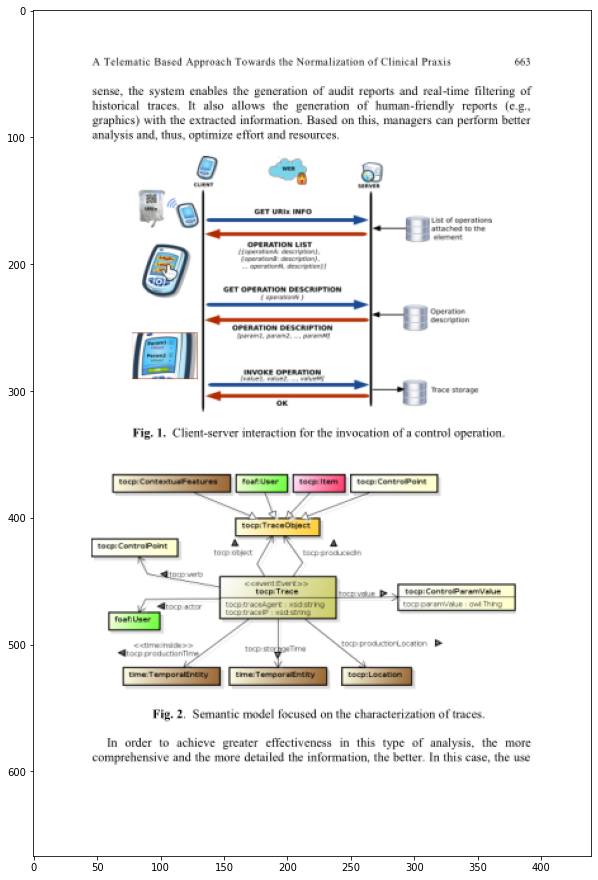

In [ ]:
url = "https://proyectoqr.umh.es/files/2016/05/2016-A-Telematic-Based-Approach-Towards-the-Normalization-of-Clinical-Praxis.pdf"
text = get_text(url, 9)

print(text)

### Scanned

Scanned by CamScanner


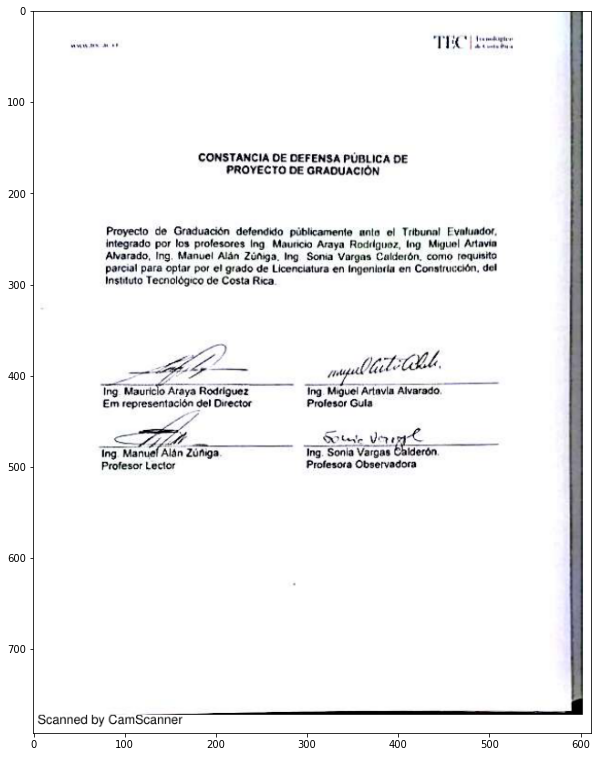

In [ ]:
url = "https://repositoriotec.tec.ac.cr/bitstream/handle/2238/6872/herramienta_gestion_proyecto_perspectiva_oficina.pdf?sequence=1&isAllowed=y"
text = get_text(url)

print(text)

Scanned by CamScanner


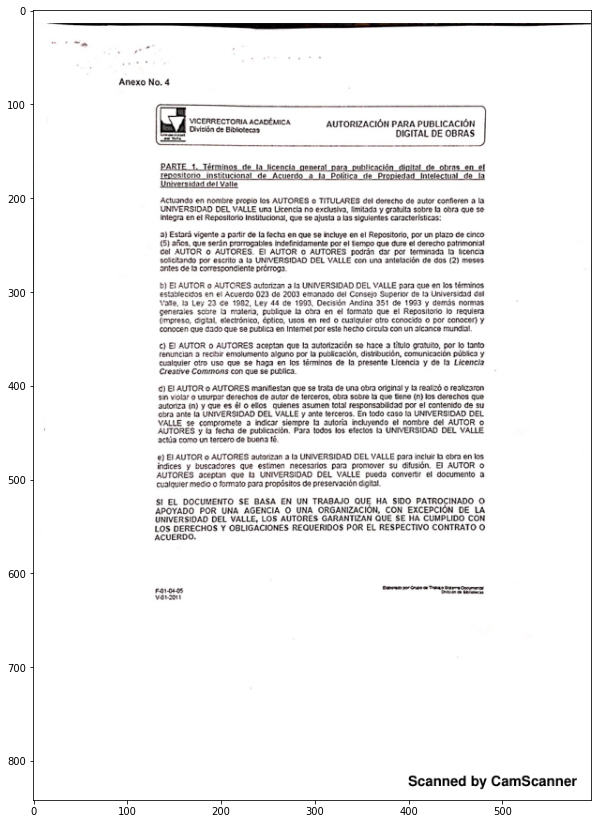

In [ ]:
url = "https://bibliotecadigital.univalle.edu.co/bitstream/handle/10893/10266/3464-0525605.pdf?sequence=1&isAllowed=y"
text = get_text(url)

print(text)